Epoch 1/100
12/12 [==============================] - 8s 164ms/step - loss: 0.1478 - val_loss: 0.1010
Epoch 2/100
12/12 [==============================] - 1s 51ms/step - loss: 0.0939 - val_loss: 0.1036
Epoch 3/100
12/12 [==============================] - 1s 50ms/step - loss: 0.0850 - val_loss: 0.0982
Epoch 4/100
12/12 [==============================] - 1s 50ms/step - loss: 0.0833 - val_loss: 0.1018
Epoch 5/100
12/12 [==============================] - 1s 52ms/step - loss: 0.0841 - val_loss: 0.0982
Epoch 6/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0832 - val_loss: 0.0990
Epoch 7/100
12/12 [==============================] - 1s 51ms/step - loss: 0.0831 - val_loss: 0.0977
Epoch 8/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0834 - val_loss: 0.0975
Epoch 9/100
12/12 [==============================] - 1s 51ms/step - loss: 0.0835 - val_loss: 0.0992
Epoch 10/100
12/12 [==============================] - 1s 49ms/step - loss: 0.0840 - val_loss: 0.098

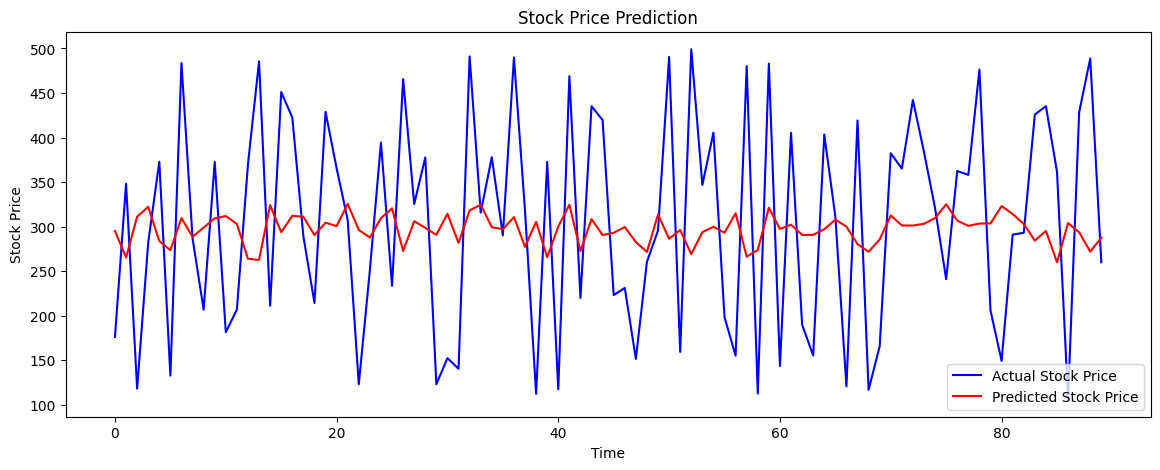

In [9]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Generating a synthetic dataset for demonstration
import random

dates = pd.date_range('2020-01-01', periods=500)
data = {
    'Date': dates,
    'Open': np.random.uniform(low=100, high=500, size=(500,)),
    'High': np.random.uniform(low=100, high=500, size=(500,)),
    'Low': np.random.uniform(low=100, high=500, size=(500,)),
    'Close': np.random.uniform(low=100, high=500, size=(500,)),
    'Volume': np.random.randint(low=1000, high=10000, size=(500,))
}
df = pd.DataFrame(data)

# Save the synthetic dataset to a CSV file
df.to_csv('stock_data.csv', index=False)

# Load the dataset (example: stock price data)
# Assuming you have a CSV file named 'stock_data.csv' with columns: Date, Open, High, Low, Close, Volume
df = pd.read_csv('stock_data.csv')

# Preprocessing the data
# Selecting features (example: using only 'Close' price as the feature)
data = df[['Close']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Creating sequences and labels
sequence_length = 50  # Adjust according to your data
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length])
    labels.append(scaled_data[i+sequence_length])

# Converting sequences and labels to numpy arrays
X = np.array(sequences)
y = np.array(labels)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print("Test Loss:", score)

# Predicting stock prices
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test)

# Display predictions and actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
